<a href="https://colab.research.google.com/github/swapnalishamrao/Supervised_ML_Classification_Project_2/blob/main/Supervised_ML_Classification_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#3792cb'><u>**Bank Marketing Effectiveness Prediction**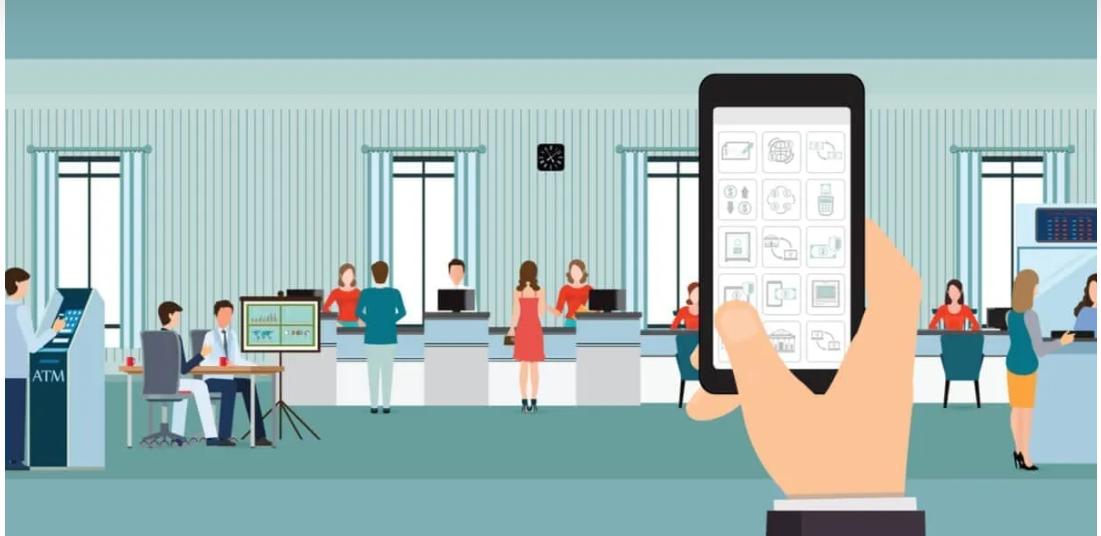

##### **Project Type**    - Supervised ML Classification
##### **Contribution**    - Individual
##### **Name**            - Swapnali Shamrao Mane

# **Project Summary -**


This project focuses on using machine learning to predict the success of bank marketing campaigns using a dataset provided by a Portuguese banking institution. The dataset contains 45,211 observations with 17 columns, including features like age, job, marital status, education, and balance. The primary goal is to build a classification model that can predict whether a client will respond positively or negatively to a campaign. This predictive model can provide valuable insights into how various factors influence campaign effectiveness, enabling banks to target their customers more effectively.

The project began with data exploration and preprocessing. Descriptive statistics were computed, and various visualizations, including distplots, count plots, and boxplots, were created to gain a better understanding of the dataset. Some columns contained a significant number of unknown values, which were treated as null and handled accordingly. Features with more than 50% null values were removed as they would negatively impact model performance. Outliers were identified and addressed using the interquartile range for specific numerical variables.

The analysis revealed several insights:

* Most term deposits are subscribed to by clients between the ages of 30 and 36.
* Clients with blue-collar jobs are less likely to subscribe to term deposits compared to those with managerial roles.
* Married clients are more likely to subscribe, while divorced clients are less likely.
* Education beyond primary level increases the likelihood of subscribing.
* Clients with no credit in default are more likely to subscribe.
* Housing and personal loans influence subscription decisions.
* The method of contact, as well as the number of calls, plays a role.
* The month of May stands out with a significantly higher subscription rate.
* The duration of contact and the absence of other loans impact subscriptions.

To prepare the data for modeling, label encoding and one-hot encoding were used for categorical variables, depending on their cardinality. Addressing class imbalance was crucial, as only 11.7% of clients subscribed to term deposits. This was resolved using the Synthetic Minority Oversampling Technique (SMOTE). Additionally, the dataset was scaled using MinMaxScaler.

Several classification models were trained, including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost, K Nearest Neighbors, Naive Bayes, Support Vector Machines. Cross-validation improved the performance of each model. The XGBoost model, in particular, emerged as the best-performing one, with high accuracy, precision, recall, F1-score, and ROC AUC score, making it suitable for predicting term deposit subscriptions.

Feature importance was analyzed using SHAP (SHapley Additive exPlanations) techniques, which identified the most influential factors in the model's predictions. It was found that lower values for most input features positively influenced subscription predictions, while higher values had a negative impact.

However, it's essential to recognize that building a robust machine learning model can be challenging. Extensive tuning and testing are often required to ensure accurate and reliable predictions. Future work may involve further model refinement, hyperparameter tuning, and exploring advanced techniques to enhance predictive performance.

In conclusion, this project successfully used machine learning to predict the effectiveness of bank marketing campaigns. It provided valuable insights into client behavior and highlighted the importance of various factors in subscription decisions. The XGBoost model, with Hyperparameter tunning, proved to be the most accurate in predicting term deposit subscriptions. This project's findings can assist the banking institution in refining its marketing strategies and improving customer targeting.



# **GitHub Link -**

https://github.com/swapnalishamrao/Supervised_ML_Classification_Project_2

# **Problem Statement**

This project analyses data from a Portuguese bank's phone-based marketing campaigns to predict whether clients will subscribe to a term deposit ('yes' or 'no'). The dataset includes client details and campaign information. We clean and process the data, handle class imbalance, build prediction models, and evaluate their performance. The goal is to improve marketing campaign targeting and effectiveness.

# ***Let's Begin !***

## ***Know Your Data***

## **Importing Library and connecting drive**

In [1]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

!pip install shap
# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
df=pd.read_csv(r"/content/drive/MyDrive/Supervised_ML_Classification_project-2/bank-full.csv", sep =";")

### **Dataset First View**

In [4]:
# First Five Observations
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Last five observations
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## **<u>Data Inispection</u>**

In [6]:
# Checking shape of the dataset
df.shape

(45211, 17)

Dataset having 45211 observations and 17 columns.

In [7]:
# Checking columns name of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### **<u>Data Description</u>**

- age: age of client (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

### **Dataset Information**

In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


1.In the dataset, there are object, float64, and int64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data (Numerical+Categorical)

4.There are 17 features

5.'y' is the output

In [9]:
# Basic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## **<u>Data Wrangling and Feature Engineering</u>**

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

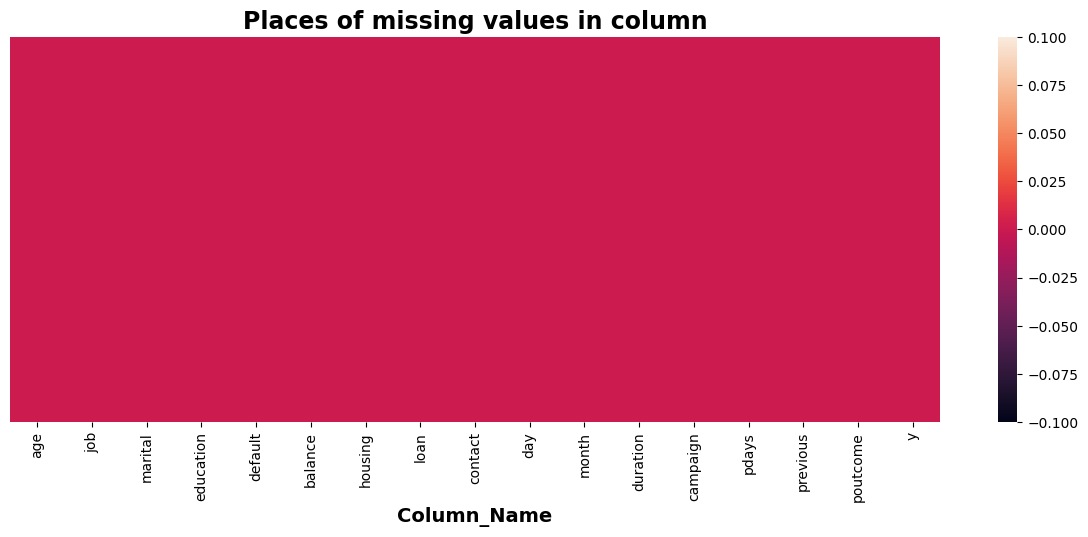

In [12]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

Dataset having 0 null values.

1.Dataset having 45211 observations and 17 features


2.In the dataset, there are object, float64, and int64 dtypes features present.

3.Dataset is having numerical and categorical data.

4.Mixed data (Numerical+Categorical)

5.'y' is the output

6.Dataset having 0 duplicate values

## **<u>Understanding Variables</u>**

In [13]:
# Basic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [14]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [15]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
  print('--'*45)

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------------------------------------
housing
['yes' 'no']
------------------------------------------------------------------------------------------
loan
['no' 'yes']
------------------------------------------------------------------------------------------
contact
['unknown' 'cellular' 'telephone']
------------------------------------------------------------------------------------------
month
['may

In [16]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [17]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [18]:
discrete_variable = [feature for feature in numerical_variables if len(df[feature].unique())<25]
print("Discrete variables count:{}".format(len(discrete_variable)))

Discrete variables count:0


* There is no discrete variable in given dataset.

In [19]:
continuous_variable = [feature for feature in numerical_variables if feature not in discrete_variable]
print("Continuous variables count:{}".format(len(continuous_variable)))
continuous_variable

Continuous variables count:7


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [20]:
# Checking unique values from each variable
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())
  print('--'*50)

No. of unique values in age is 77
----------------------------------------------------------------------------------------------------
No. of unique values in job is 12
----------------------------------------------------------------------------------------------------
No. of unique values in marital is 3
----------------------------------------------------------------------------------------------------
No. of unique values in education is 4
----------------------------------------------------------------------------------------------------
No. of unique values in default is 2
----------------------------------------------------------------------------------------------------
No. of unique values in balance is 7168
----------------------------------------------------------------------------------------------------
No. of unique values in housing is 2
----------------------------------------------------------------------------------------------------
No. of unique values in loan is 2
-

- job, marital, education, default, housing, loan, contact, month, poutcome, and y are among the 10 categorical variables in this dataset.
- There are 7 numerical variables in this dataset: age, balance, day, duration, campaign, pdays, and previous.
- The unknown values for features job, education, contact, and poutcome are 288; 1857; 13020; and 36959, respectively. Unknown values can be treated as null since they are not defined and can be taken out of features by treatment.

# **Data Cleaning**

#### **<u> Handling Duplicate Values</u>**

In [21]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


#### **<u> Handling Null / Missing Values</u>**

In [22]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [23]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
month,0,0.00
previous,0,0.00
pdays,0,0.00
campaign,0,0.00
duration,0,0.00


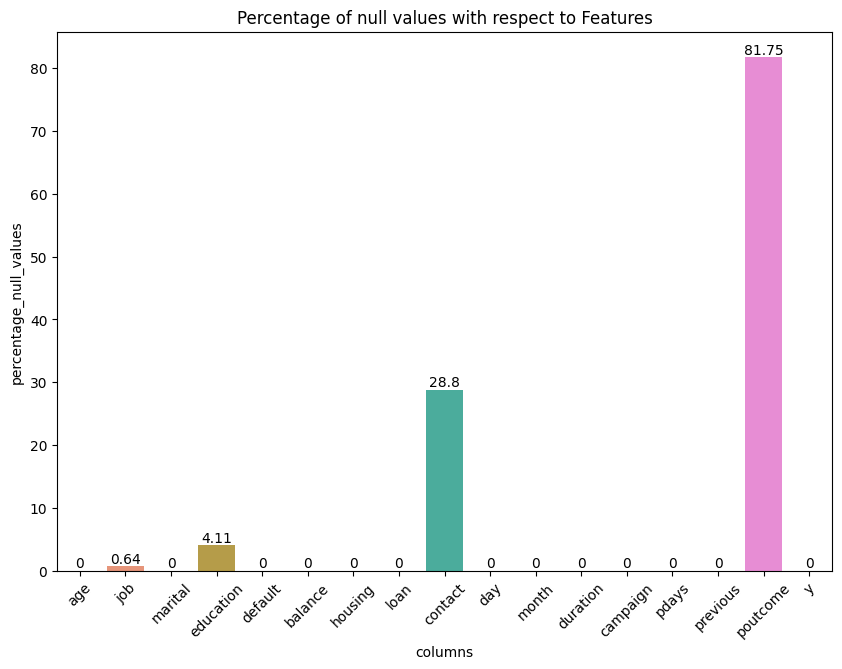

In [24]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

The null values for poutcome, contact, education, and job are 81.75%, 28.80%, 4.11%, and 0.64%, respectively.

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

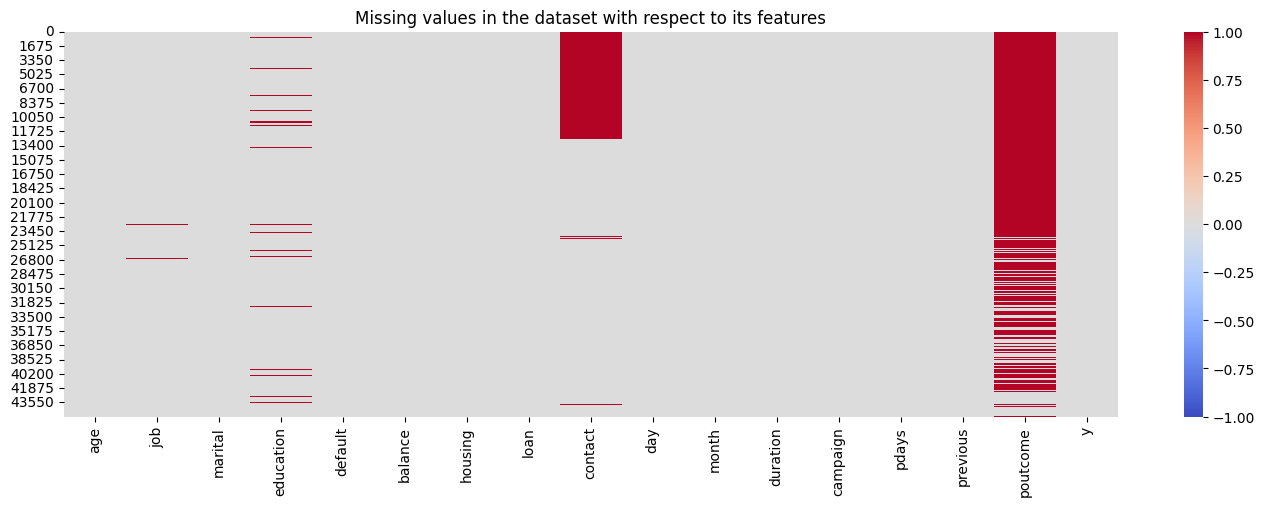

In [25]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [26]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64
------------------------------------------------------------------------------------------
cellular     29285
telephone     2906
Name: contact, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
------------------------------------------------------------------------------------------


In [27]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [28]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [29]:
# Nullfree shape of dataset
df.shape

(45211, 16)

### **<u>Handling Outliers</u>**

__________________________________________________________________________________________


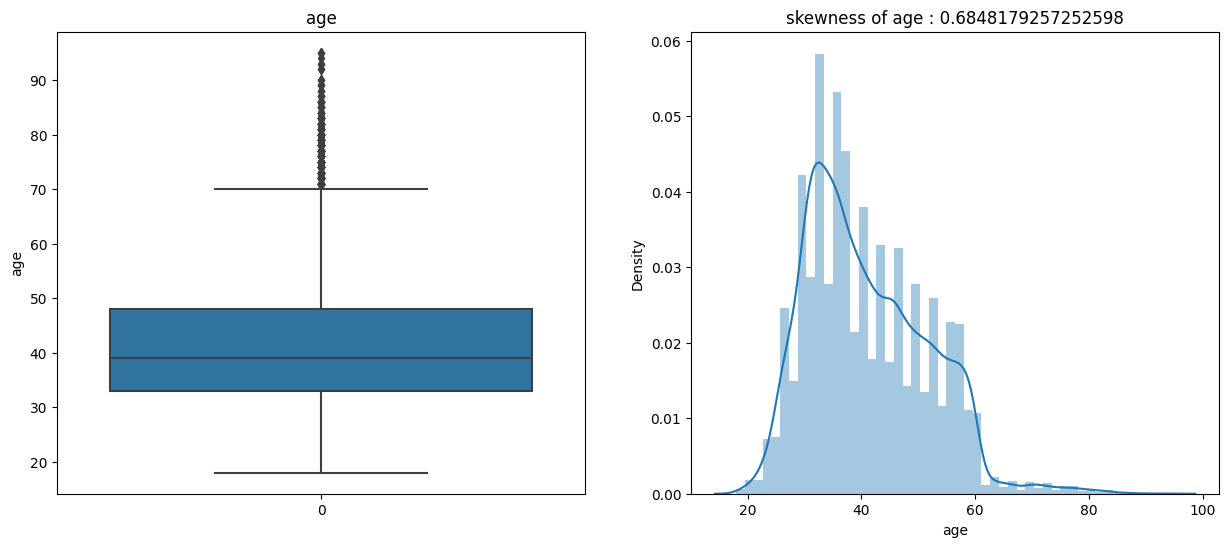

__________________________________________________________________________________________


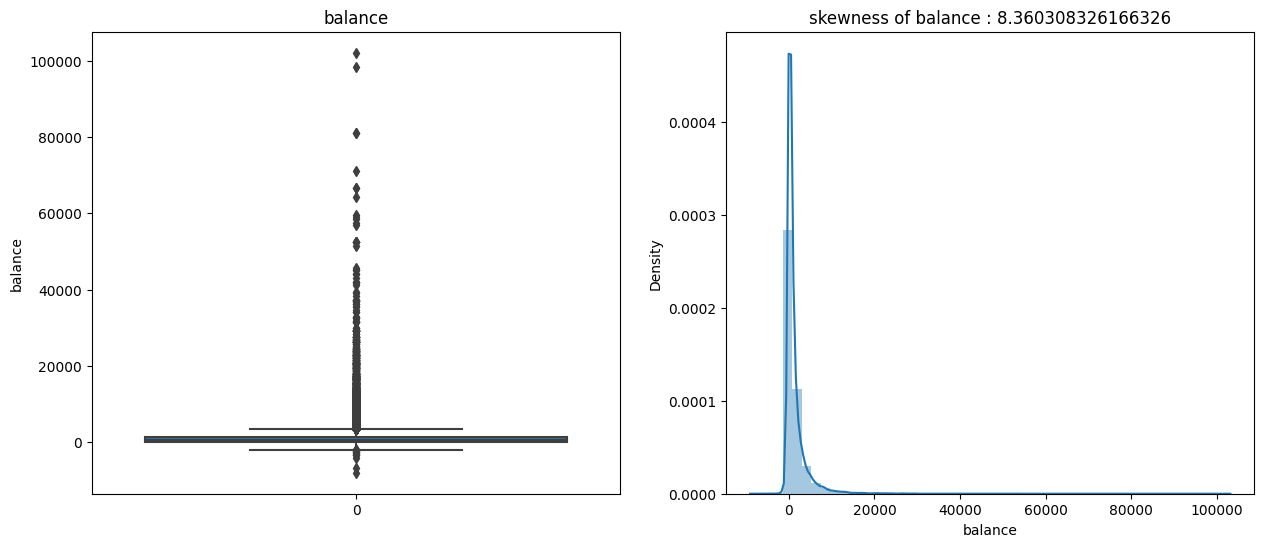

__________________________________________________________________________________________


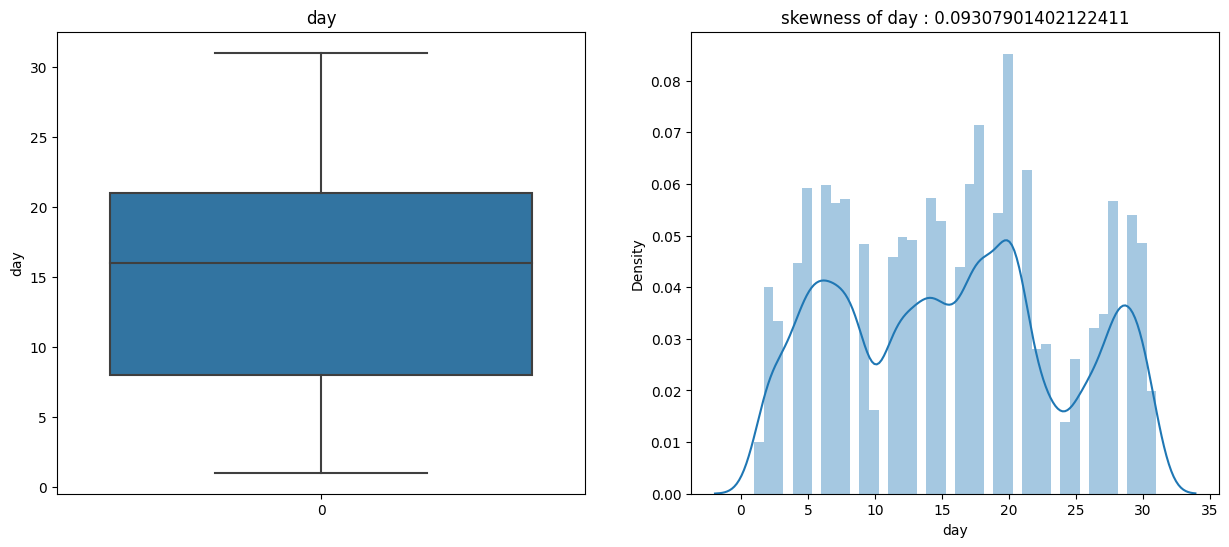

__________________________________________________________________________________________


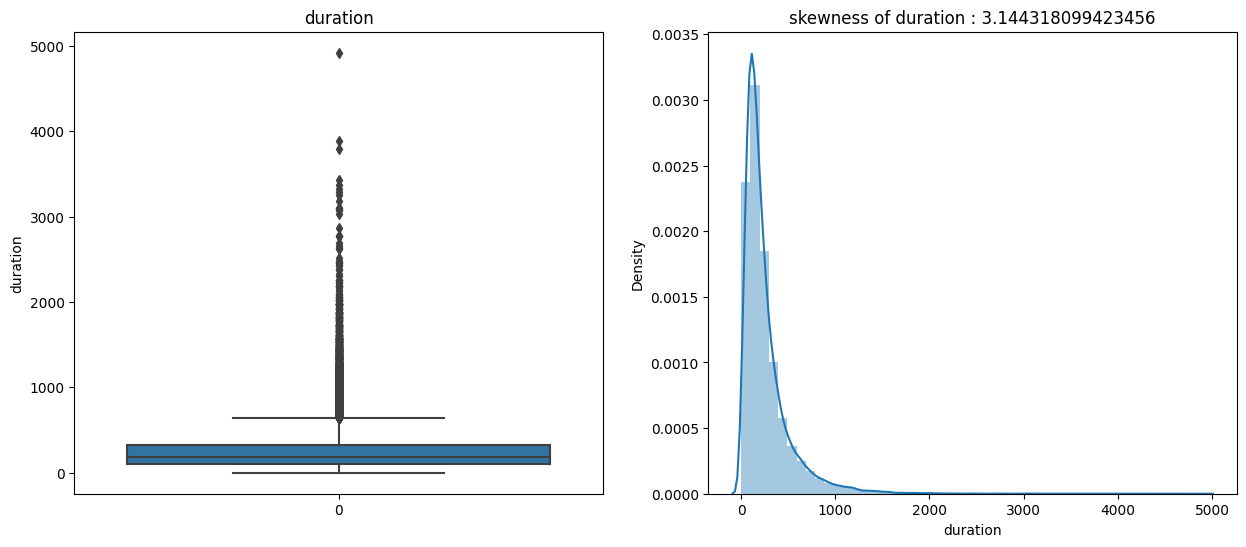

__________________________________________________________________________________________


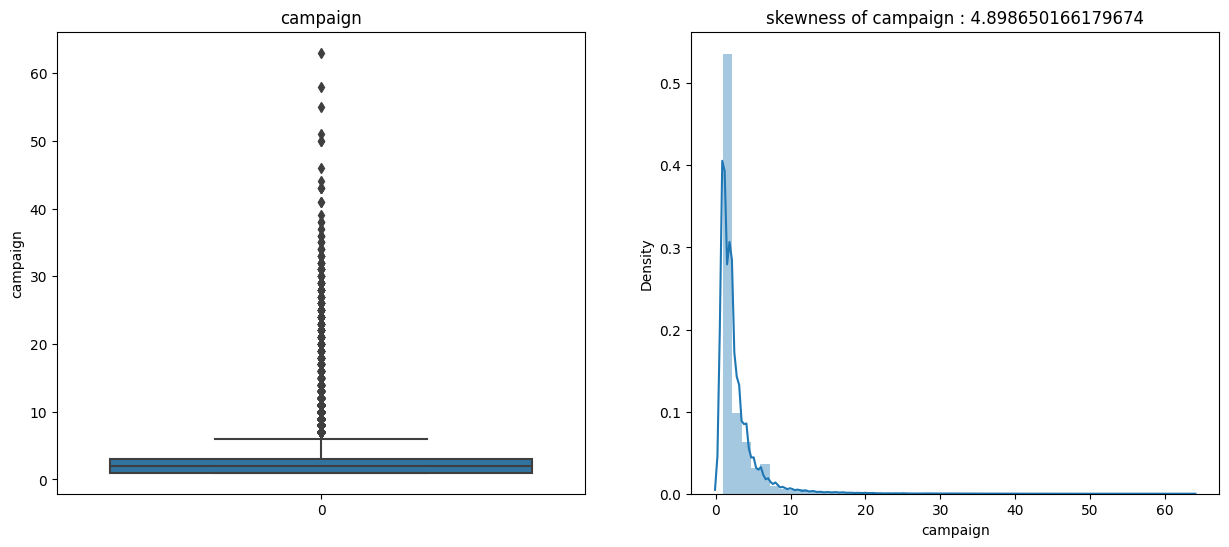

__________________________________________________________________________________________


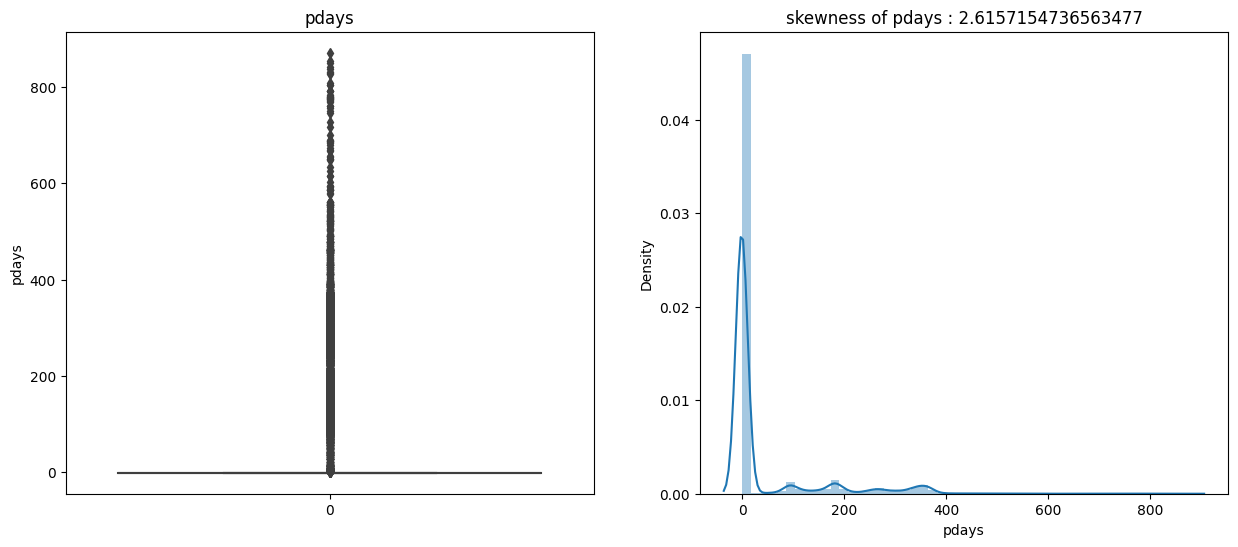

__________________________________________________________________________________________


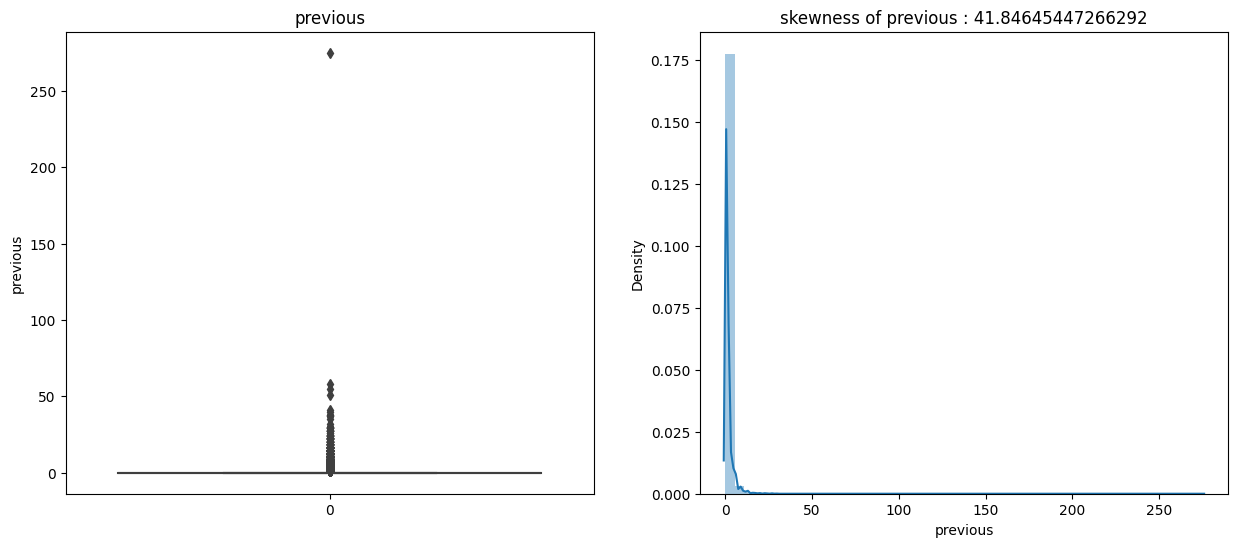

In [30]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var])
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.

In [31]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


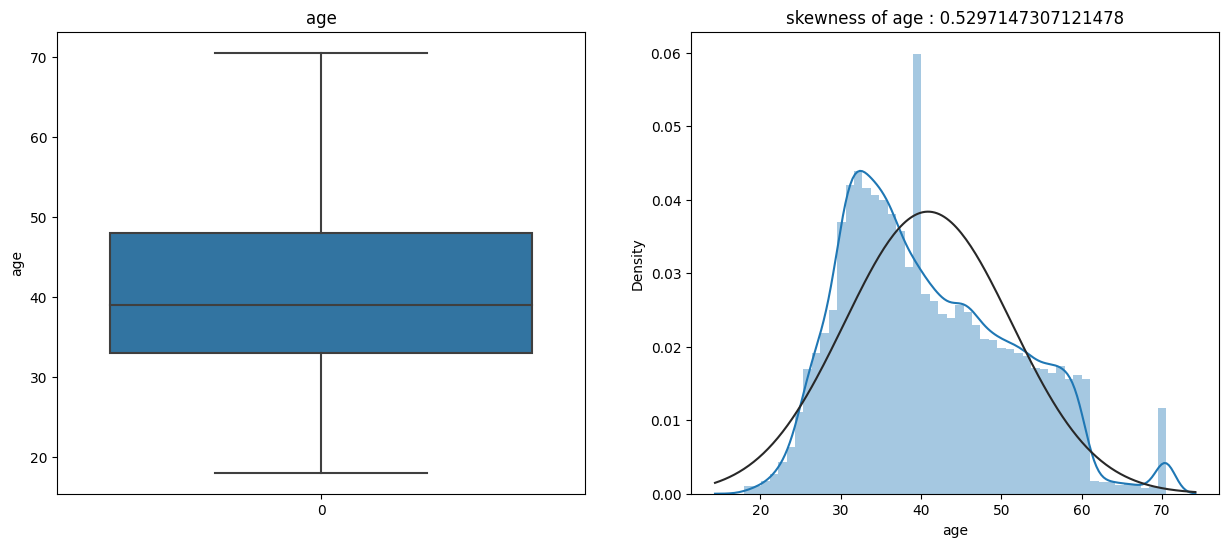

__________________________________________________________________________________________


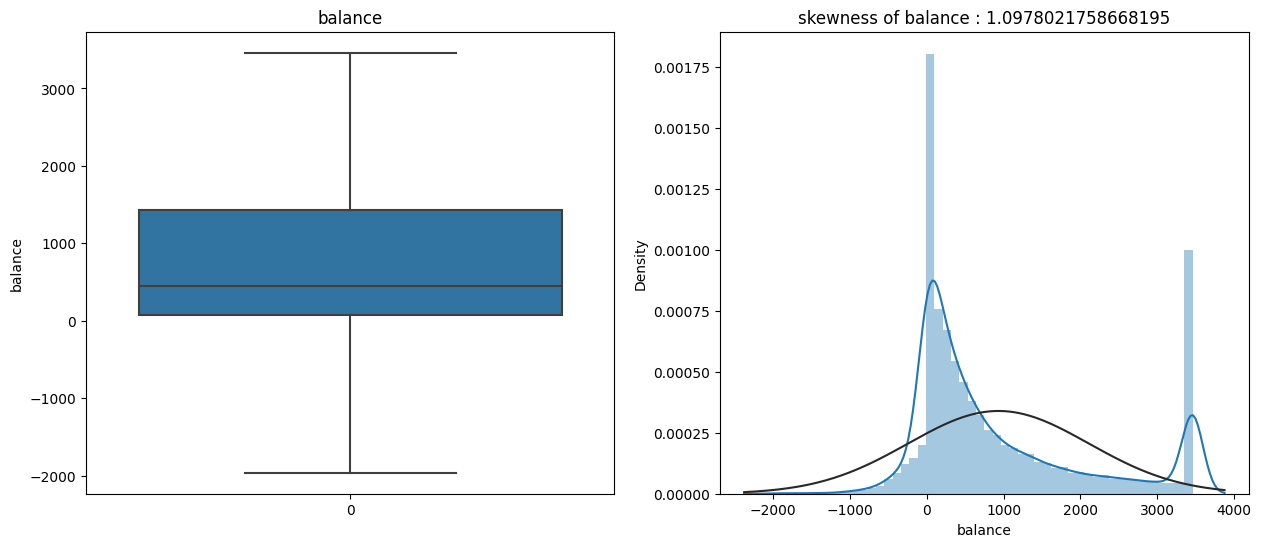

__________________________________________________________________________________________


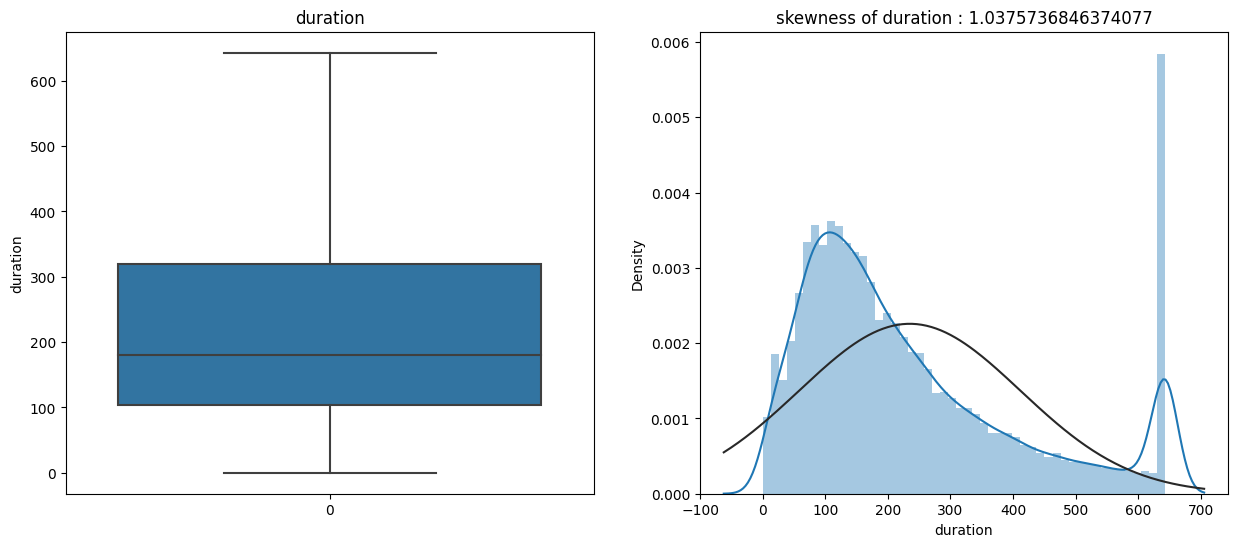

__________________________________________________________________________________________


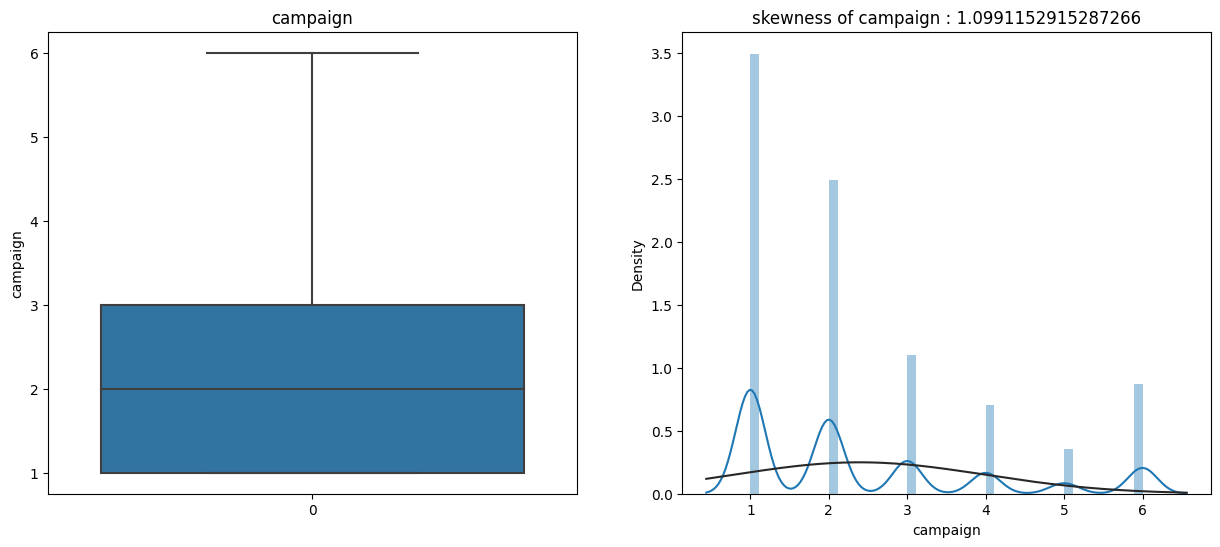

In [32]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- Outliers are successfully removed from the dataset.

* The dataset doesn't have any duplicate values, which is good.

* There are some missing values (unknown values) in the columns for Job, Education, Contacts, and Poutcome. Since we don't know what these values are supposed to be, we treat them like they don't exist.

* The columns Poutcome, Contact, Education, and Job have missing values, and the percentage of missing values in each of them is 81.45%, 28.80%, 4.11%, and 0.64%, respectively.

* To deal with these missing values, we filled them in with the most common value in each respective column for Contact, Education, and Job. However, for columns with more than 50% missing values, we decided to remove them because they weren't useful for our analysis and could have made our model perform poorly.

* Some unusual or extreme values in certain columns, like Age, Balance, Duration, Campaign, P-days, and Previous, were treated using a method called the "interquartile range." This helps us identify and handle values that are very different from the majority of the data. However, for the columns Pdays and Previous, we decided to remove them because they didn't show much variation and weren't very useful.

* No unusual or extreme values were found in the "Day" column, so we didn't make any changes to it.

# **::---------Exploratory Data Analysis -----------::**

## **<u>Univariate Analysis</u>**

### **Visualize the subscription rate by job**

In [33]:
job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
job_response_pct = job_response_pct.transpose()

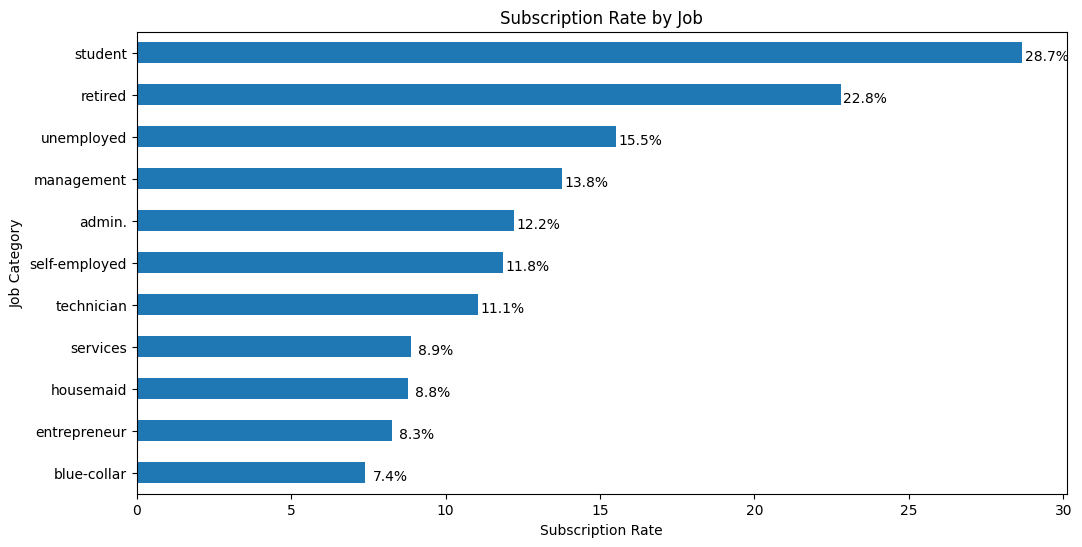

In [34]:
job = job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(job.patches,
                      job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    job.text(rec.get_width()+0.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

Insights:- target students and retired clients

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

## **Visualize the subscription rate by Age_group:-**

In [35]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [36]:
age_response_pct = pd.crosstab(df['y'],df['age_group']).apply(lambda x: x/x.sum() * 100)
age_response_pct = age_response_pct.transpose()

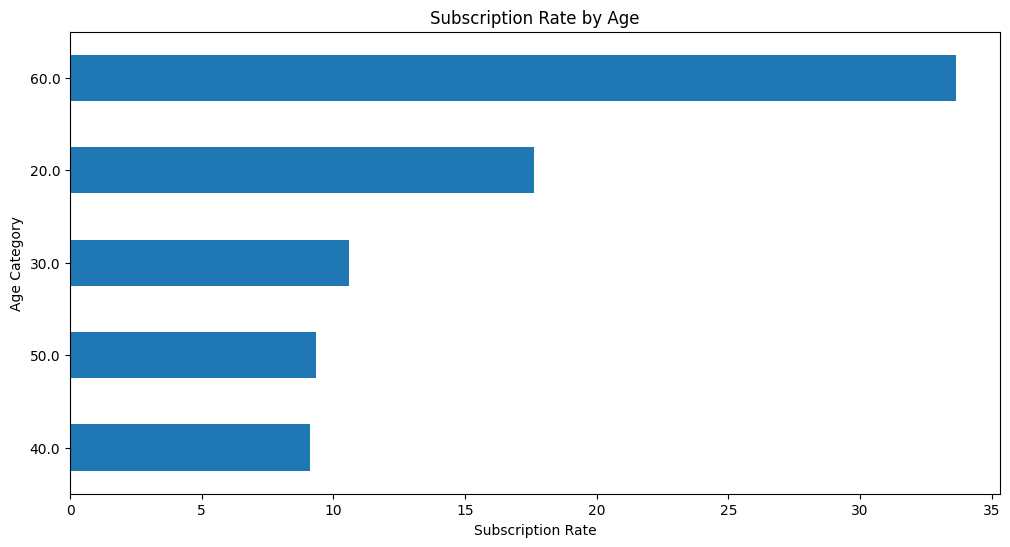

In [37]:
age = age_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))

plt.title('Subscription Rate by Age')
plt.xlabel('Subscription Rate')
plt.ylabel('Age Category')

# Label each bar
for rec, label in zip(job.patches,
                      job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    job.text(rec.get_width()+0.8,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom')

**Insights**: target the youngest and the oldest instead of the middle-aged

 bars chart indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are preferable to the eldest.

The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

However,bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

### **Visualize the subscription rate by balance level**

In [38]:
lst = [df]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [39]:
balance_response_pct = pd.crosstab(df['y'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
balance_response_pct = balance_response_pct.transpose()

In [40]:
bal = pd.DataFrame(df['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,3]
bal = bal.sort_values('bal',ascending = True)

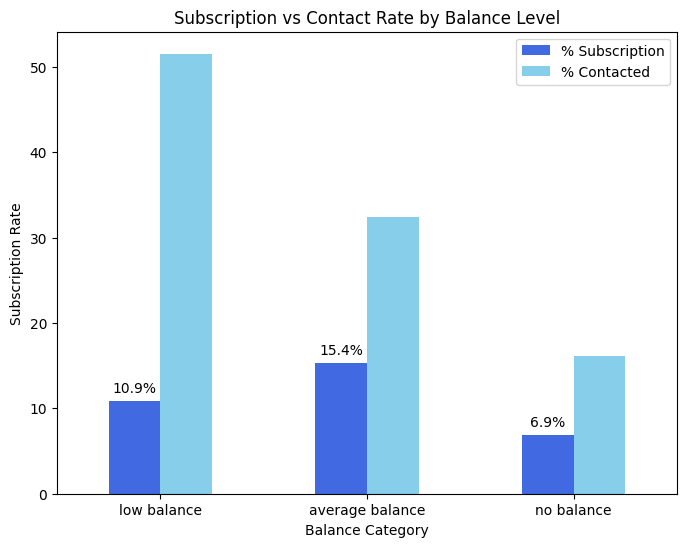

In [41]:
balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    balance.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')

### **Find Categorical feature distribution**

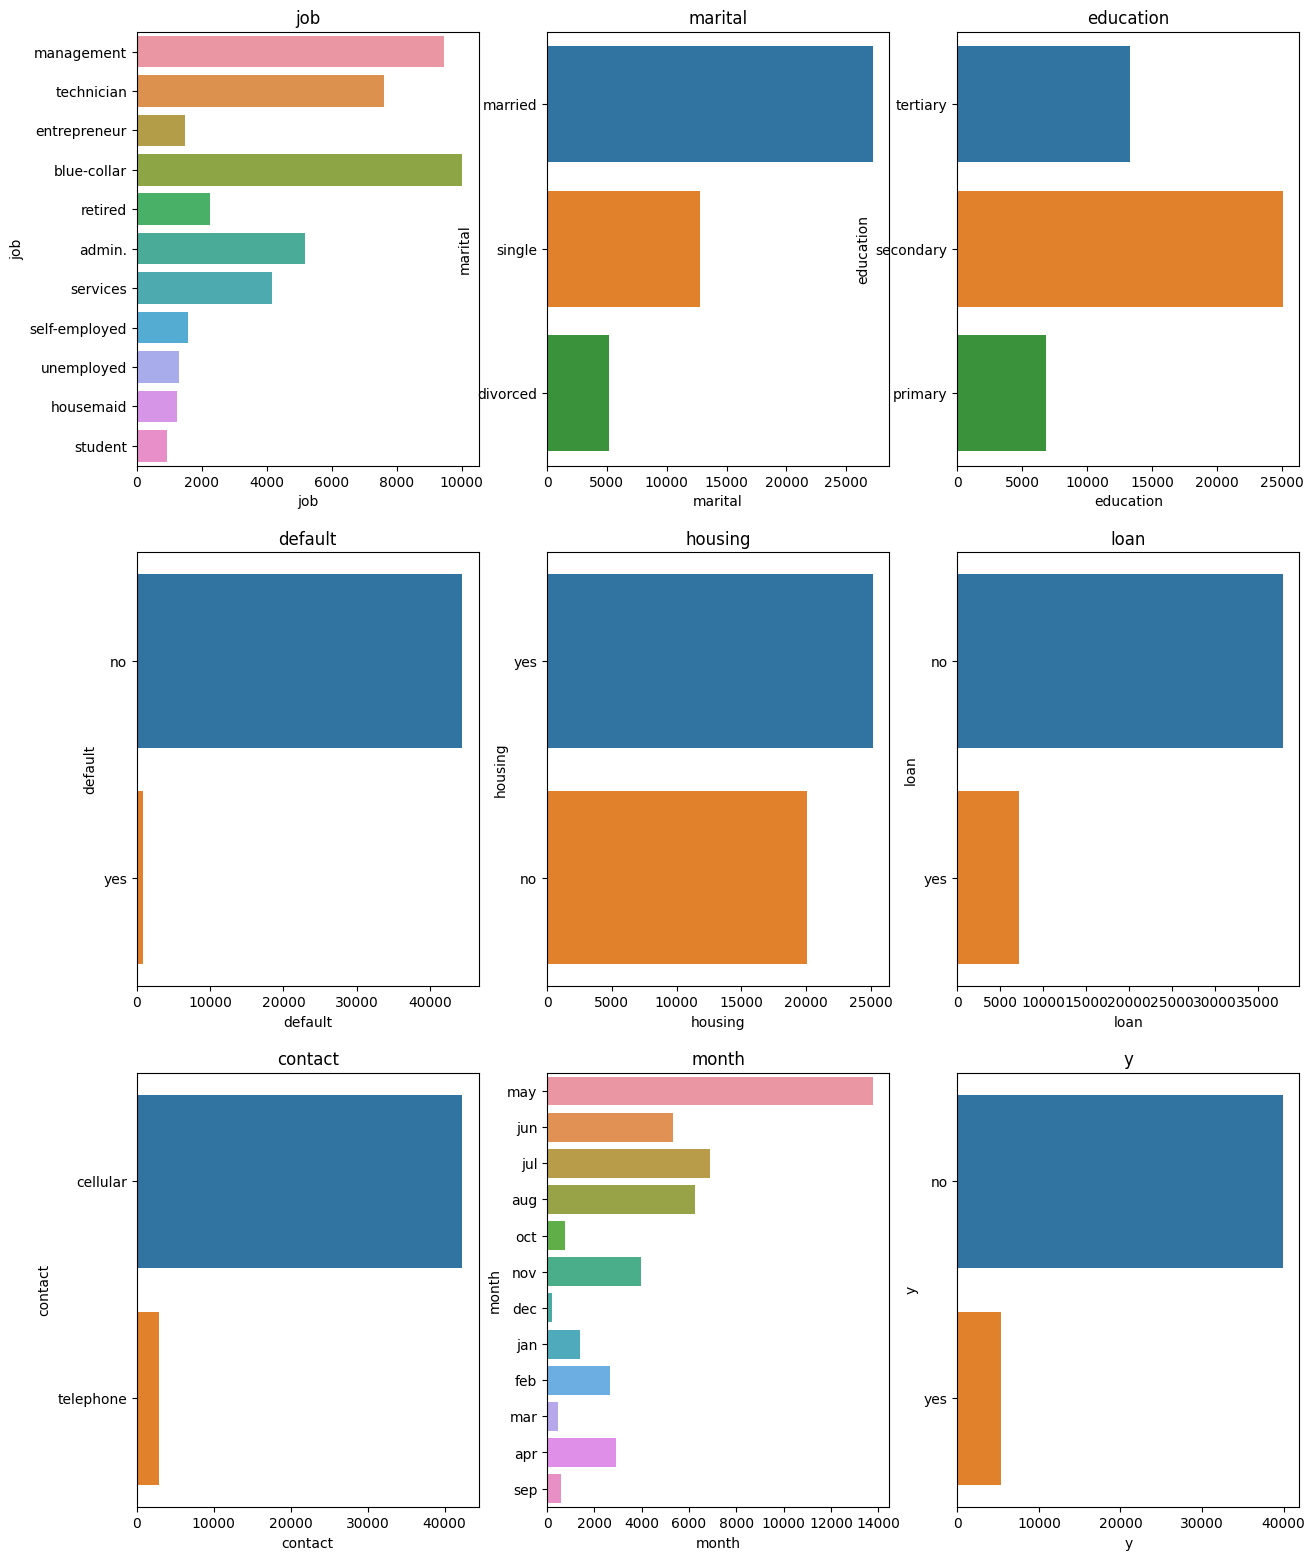

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

# Assuming you have a list of categorical feature names called categorical_variables_list
categorical_variables_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','y']

for categorical_variable in categorical_variables_list:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(y=categorical_variable, data=df)  # Use the data parameter to specify the DataFrame
    plt.xlabel(categorical_variable)
    plt.title(categorical_variable)
    plotnumber += 1

plt.show()


* client with job type as management records are high in given dataset and housemaid are very less.
* client who married are high in records in given dataset and divorced are less.
* client whoes education background is secondaray are high numbers in given dataset.
* default feature seems to be does not play important roel as it has value of no high ratio to value yes which drop.
* data in month of may is high and less in dec.

### **<u> Bivariate Analysis<u>**

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their job and education'}, xlabel='job,education,y'>

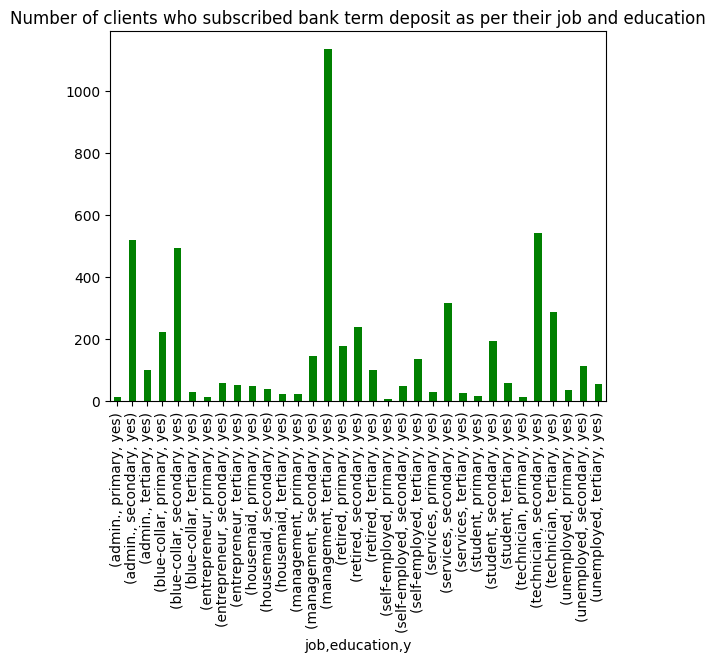

In [49]:
# Plotting a count plot to vizualize the number of customers according to their jobs and lvel of education by using group by operation

# Dataset having only subscribed Bank term deposit with job and education
subscribed_df = df[df.y=='yes']
subscribed_df2=subscribed_df.groupby(['job','education','y'])['y'].count()

# Plotting bar plot for subscribed Bank term deposit with job and education
subscribed_df2.plot(kind="bar",title = 'Number of clients who subscribed bank term deposit as per their job and education', color="g")

- Most clients who have management-related jobs and a tertiary degree have subscribed to the term deposits.
- Customers with a secondary education are the second most likely to subscribe to term deposits.

no     39922
yes     5289
Name: y, dtype: int64


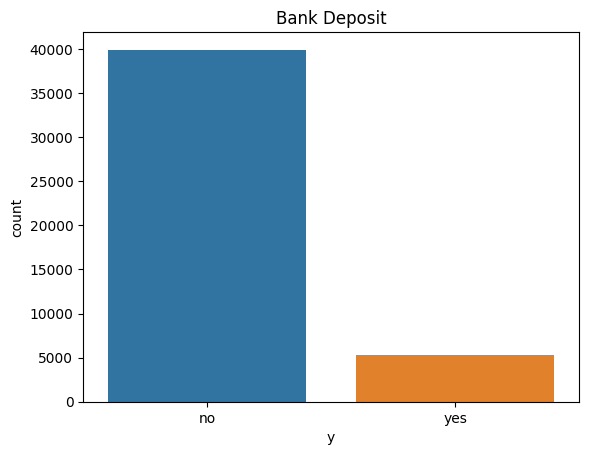

In [50]:
print(df.y.value_counts())
axes1 = sns.countplot(x='y', data= df)
# giving title to the plot
plt.title('Bank Deposit');

1.Bank deposit product subscribed by 5289 people out of 45211.

2.Bank deposit product not subscribed by 39922 people out of 45211.

3.Not subscribed count is greater than the subscription so this dataset is imbalanced data.

In [51]:
subscriber = pd.DataFrame(df["y"].value_counts()).reset_index()
subscriber.columns =["Labels","y"]
subscriber

,Labels,y
0,no,39922
1,yes,5289


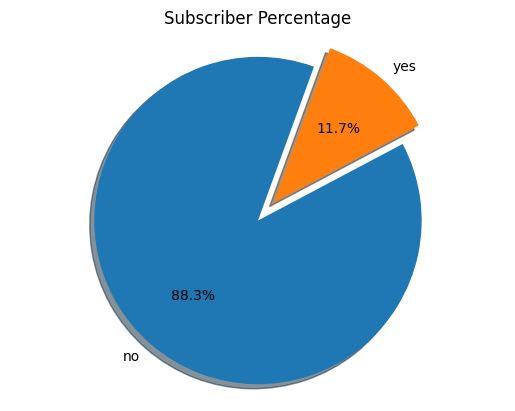

In [52]:
fig, ax = plt.subplots()
explode = (0, 0.15)
ax.pie(subscriber["y"], explode=explode, labels=subscriber["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

From the above we can see that the data is having a huge bias('no%': 88.3%, 'yes%':11.7%) towards the category of clients not subscribing a term deposite. Hence we can build an opinion that our model will tends to perform better towards predicting which clients will not subscrive a term deposite.

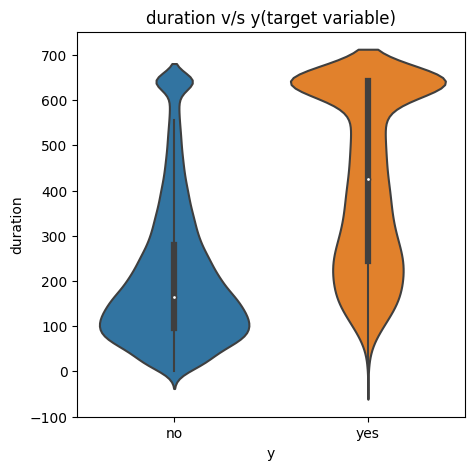

In [53]:
# Plotting box plot for checking the spread of duration in seconds for the target variable(yes or no)
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=df['y'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
plt.show()

- Clients are more likely to subscribe to term deposits if they spend more time on the phone.
- Average of 400 seconds required to convey clients' intent to subscribe and make a term deposit.

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

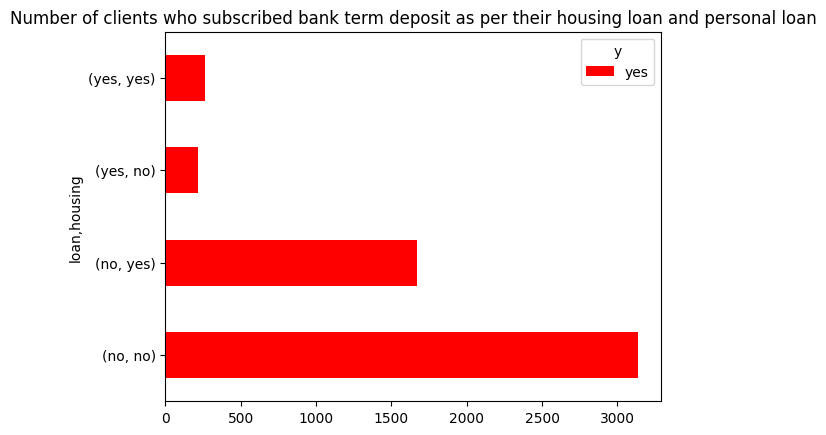

In [54]:
# Plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan and personal loan

# Dataset having only subscribed Bank term deposit with housing loan and personal loan
df_loan_yes = df[df.y=='yes']
df_loan_yes2=df_loan_yes.groupby(['loan','housing','y'])['y'].count().unstack()

# Plotting bar plot for subscribed Bank term deposit with housing loan and personal loan
df_loan_yes2.plot(kind="barh",title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan',color='r')

## **<u>Multivariate Analysis<u>**

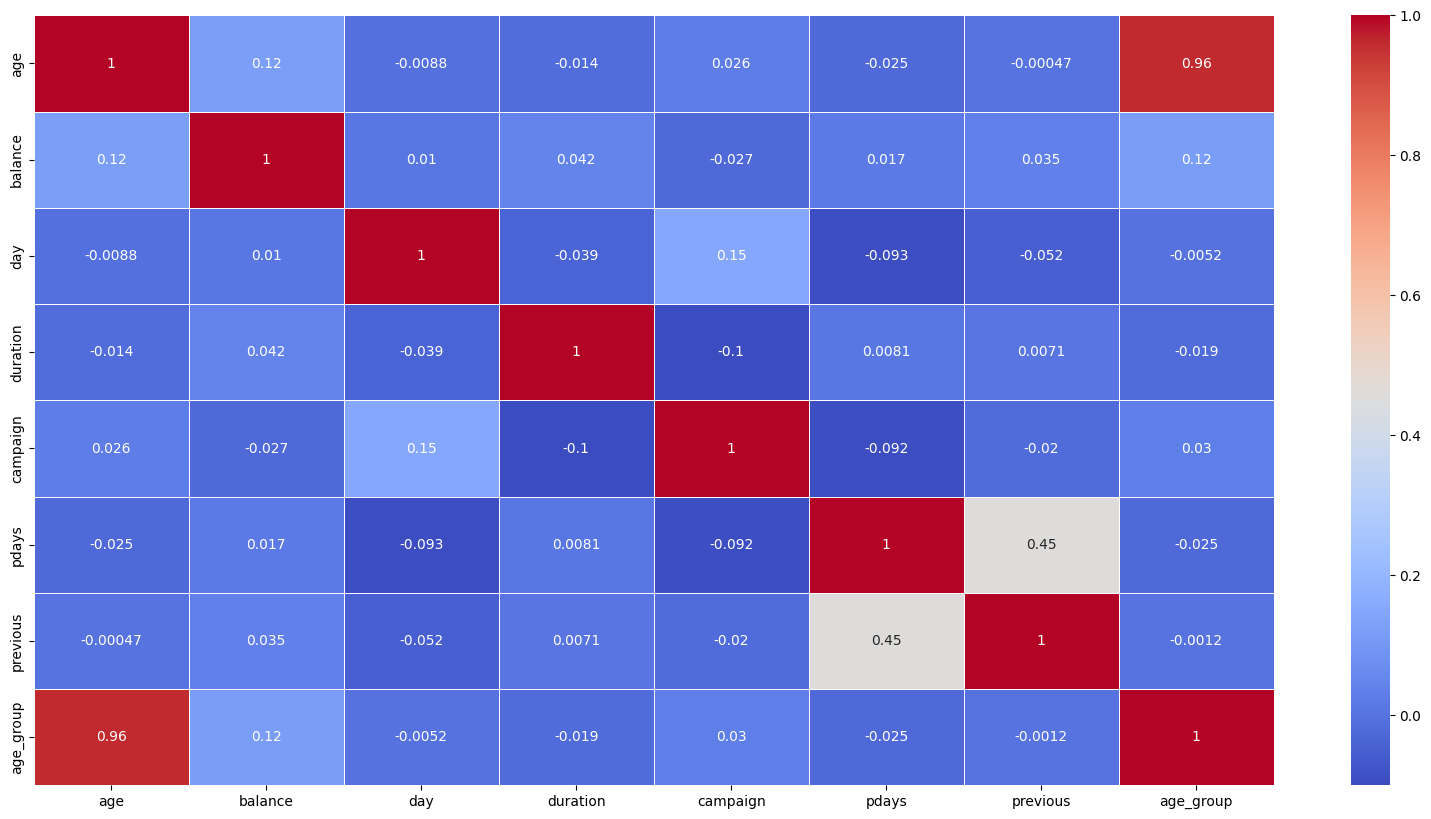

In [55]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

There is no correlation between any independent variables.

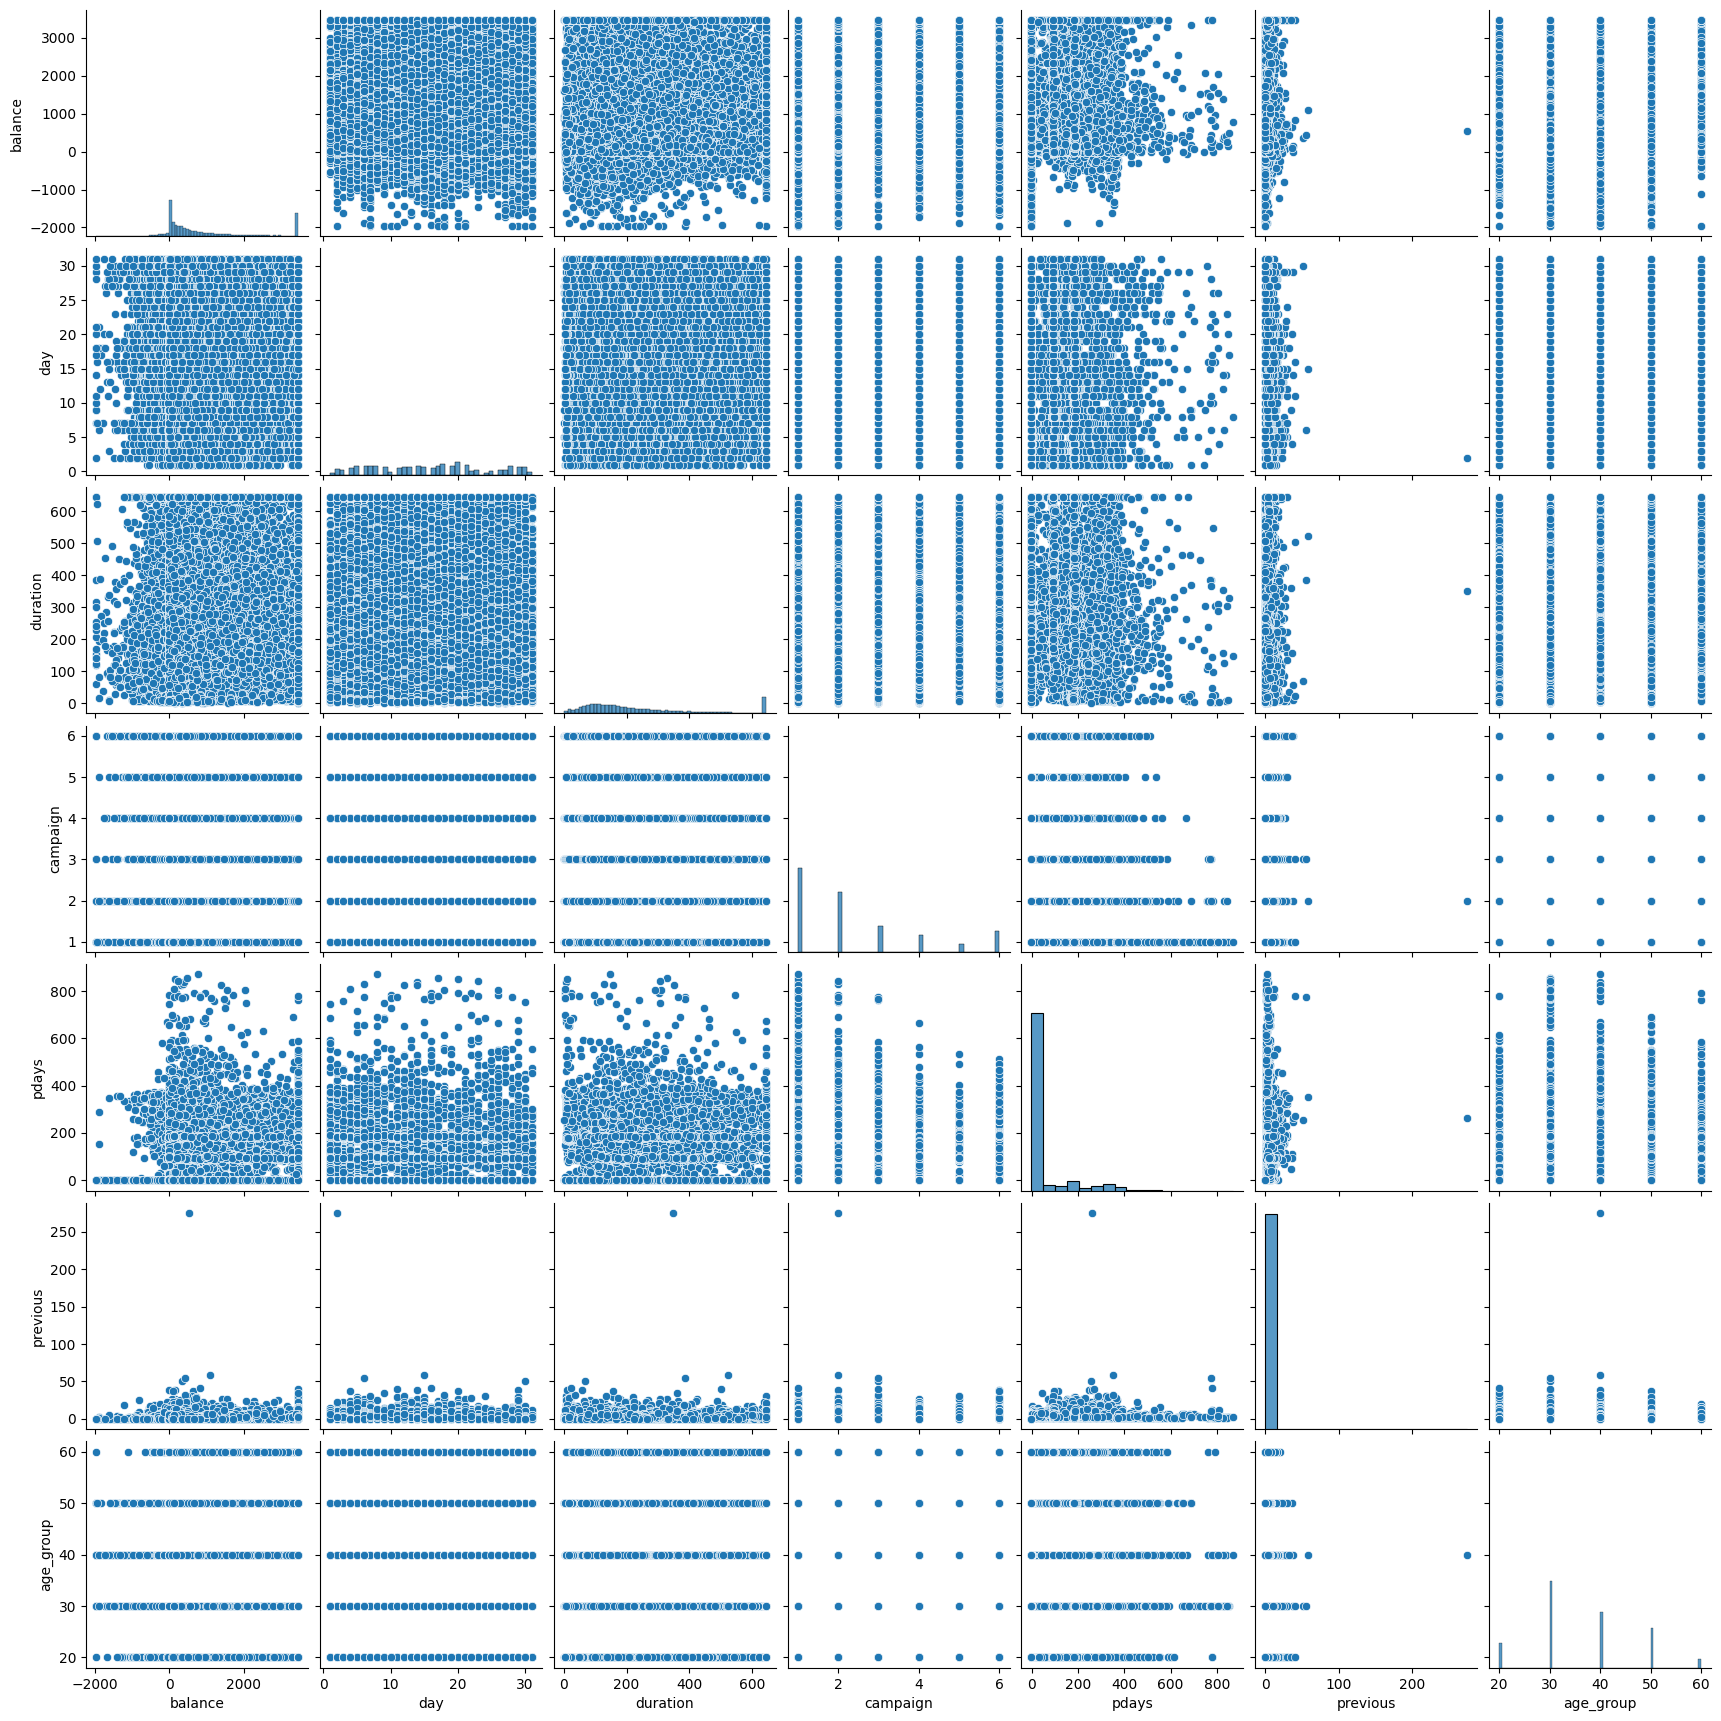

In [56]:
sns.pairplot(df.iloc[:,1:])

**Age**: Most clients are between 25 and 65 years old. The data is slightly skewed to the right, meaning there are more older clients than younger ones.

**Job**: The most common job categories are 'blue-collar,' 'management,' and 'technician.' These jobs are more prevalent in the dataset, and it's skewed to the right, indicating fewer people in less common job categories.

**Marital Status**: Married clients are more likely to subscribe to the term deposit compared to other marital statuses.

**Education**: Clients with higher education levels are more common in the dataset. However, there are also many clients with unknown education levels.

**Balance**: The balance column has a long tail on the right side, suggesting the presence of outliers. Some clients have very high account balances.

**Housing Loan**: Clients without housing loans are more likely to subscribe to the term deposit.

**Duration**: Most calls are relatively short in duration. There are also many outliers, indicating some very long calls. Most calls are short.

**Campaign**: Most clients have been contacted by the bank between 1 to 5 times. Some clients have been contacted more than 20 times, but they are less likely to subscribe to the term deposit. The subscription rate is higher when the number of calls is less than 5.

* Older clients are more common, but there are also younger clients.

* Common job categories include 'blue-collar,' 'management,' and 'technician.'

* Married clients are more likely to subscribe.
Many clients have higher education, but there are also some with unknown education levels.

* Some clients have a lot of money in their accounts (outliers).

* Clients without housing loans are more likely to subscribe.

* Most calls are short in duration, but there are some very long calls.

* Most clients have been contacted a few times, and high contact frequency may reduce the likelihood of subscription.

# **Hypothesis Testing**

## **Hypothesis Questions:**
1.Are retired people more likely to subscribe for term deposits? This may be true as usually retired people prefer safe investments in form of fixed deposits rather than other risky investments.

2.Do salaried people prefer it more than business owners and entrepreneurs? This may be true as it is reasonable to think business people would invest money back into their business rather than putting it in banks.

3.Are married people more likely to subscribe for the term deposits? This may be true as married people often tend to ensure savings for their family.

4.If you already have loans, would you be less likely to subscribe to term deposits?

5.Are younger customers more likely to subscribe to a term deposit compared to old customers (age>60) ?

## **Answering Hypothesis Questions:**
1.Are senior (retired) people more likely to subscribe for term deposits? (they may prefer safe investments)

Observation: No. The number of subscriptions by retired people are less. But We can see a positive result of the marketing campaign on senior people i.e the proprtion of yes/no is more for retired folks. [See table below]

Similarly, it is also interesting to see a very positive effect of the marketing campaign on students.

2.Do salaried people prefer it more than business owners who would invest money into their business rather than putting in bank?

Observation: Yes. Salaried People (admin, service, technician, blue collar jobs etc. ) are much more interested than entrepreneurs and self employed people.

3.Are married people more likely to subscibe for term deposits? (They may prefer having savings for their children?)

Observation: No, Proportion of single subscribers is more by 3%.

4.If you already have loans, would you be less likely to subscibe to term deposits?

Observation: People having personal loans subscribe less to the term deposits. The same is not true for people with home loans.

# **Data Pre-processing**

## **Categorical Encoding**

In [57]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   day            45211 non-null  int64  
 10  month          45211 non-null  object 
 11  duration       45211 non-null  int64  
 12  campaign       45211 non-null  int64  
 13  pdays          45211 non-null  int64  
 14  previous       45211 non-null  int64  
 15  y              45211 non-null  object 
 16  age_group      45211 non-null  float64
 17  balance_group  45211 non-null  object 
dtypes: flo

In [58]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y', 'balance_group']


In [59]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64
__________________________________________________________________________________________
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
__________________________________________________________________________________________
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64
__________________________________________________________________________________________
no     44396
yes      815
Name: default, dtype: int64
__________________________________________________________________________________________
yes    25130
no     20081
Name: housing, dtype: int64
__________________________________________________________________________________

In [60]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['balance_group']=df['balance_group'].map({'no balance':0,'low balance':1,'average balance':2 })
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [61]:
df_job = pd.get_dummies(df["job"], drop_first = True)

In [62]:
df_month = pd.get_dummies(df["month"], drop_first = True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   job            45211 non-null  object 
 2   marital        45211 non-null  int64  
 3   education      45211 non-null  int64  
 4   default        45211 non-null  int64  
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  int64  
 7   loan           45211 non-null  int64  
 8   contact        45211 non-null  int64  
 9   day            45211 non-null  int64  
 10  month          45211 non-null  object 
 11  duration       45211 non-null  int64  
 12  campaign       45211 non-null  int64  
 13  pdays          45211 non-null  int64  
 14  previous       45211 non-null  int64  
 15  y              45211 non-null  int64  
 16  age_group      45211 non-null  float64
 17  balance_group  45211 non-null  int64  
dtypes: flo

In [64]:
df = pd.concat([df,df_job, df_month], axis=1)

In [65]:
df.shape

(45211, 39)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   job            45211 non-null  object 
 2   marital        45211 non-null  int64  
 3   education      45211 non-null  int64  
 4   default        45211 non-null  int64  
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  int64  
 7   loan           45211 non-null  int64  
 8   contact        45211 non-null  int64  
 9   day            45211 non-null  int64  
 10  month          45211 non-null  object 
 11  duration       45211 non-null  int64  
 12  campaign       45211 non-null  int64  
 13  pdays          45211 non-null  int64  
 14  previous       45211 non-null  int64  
 15  y              45211 non-null  int64  
 16  age_group      45211 non-null  float64
 17  balance_group  45211 non-null  int64  
 18  blue-c

In [67]:
df.drop(["job"],axis=1, inplace = True)

In [68]:
df.drop(["month"],axis=1, inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   marital        45211 non-null  int64  
 2   education      45211 non-null  int64  
 3   default        45211 non-null  int64  
 4   balance        45211 non-null  int64  
 5   housing        45211 non-null  int64  
 6   loan           45211 non-null  int64  
 7   contact        45211 non-null  int64  
 8   day            45211 non-null  int64  
 9   duration       45211 non-null  int64  
 10  campaign       45211 non-null  int64  
 11  pdays          45211 non-null  int64  
 12  previous       45211 non-null  int64  
 13  y              45211 non-null  int64  
 14  age_group      45211 non-null  float64
 15  balance_group  45211 non-null  int64  
 16  blue-collar    45211 non-null  uint8  
 17  entrepreneur   45211 non-null  uint8  
 18  housem

In [70]:
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58.0,1,1,0,2143,1,0,1,5,261,...,0,0,0,0,0,0,1,0,0,0
1,44.0,0,0,0,29,1,0,1,5,151,...,0,0,0,0,0,0,1,0,0,0
2,33.0,1,0,0,2,1,1,1,5,76,...,0,0,0,0,0,0,1,0,0,0
3,47.0,1,0,0,1506,1,0,1,5,92,...,0,0,0,0,0,0,1,0,0,0
4,33.0,0,0,0,1,0,0,1,5,198,...,0,0,0,0,0,0,1,0,0,0


In [71]:
df.shape

(45211, 37)

### **Separating Dependant and Independant variables**

In [72]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

### **Feature Manipulation & Selection**

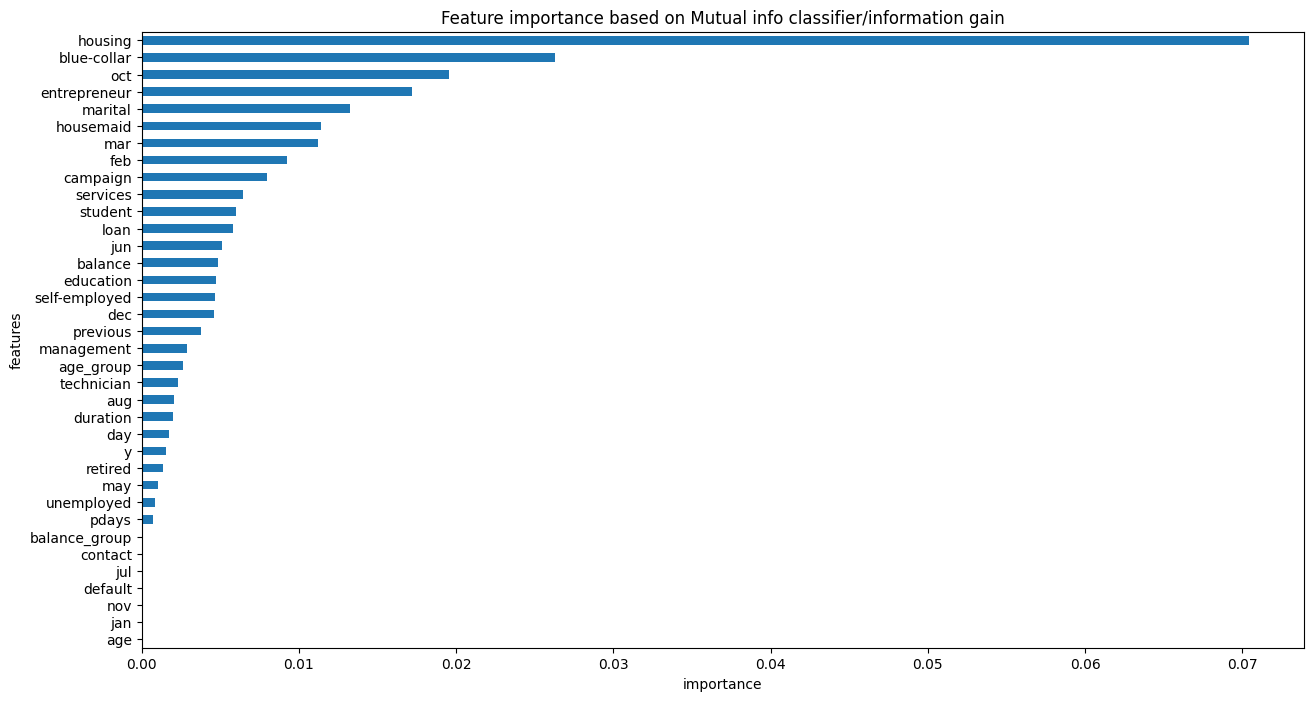

In [73]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:36])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

Important features are listed in descending order of their importance and can be removed if they are no longer important, but all the features that we have included have significant importance, so we are keeping all of them.

### **Handling Imbalanced Dataset**

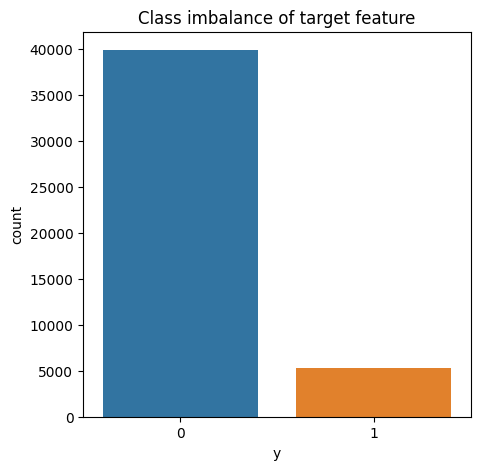

In [79]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['y'])
plt.title('Class imbalance of target feature')
plt.show()

 We clearly detect a class imbalance beacause discovered that the number of clients who subscribed to term deposits is 11.7% lower than the number of clients who did not (88.3%).

In [80]:
# Import model imblearn in envirnoment
!pip install imblearn

In [81]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

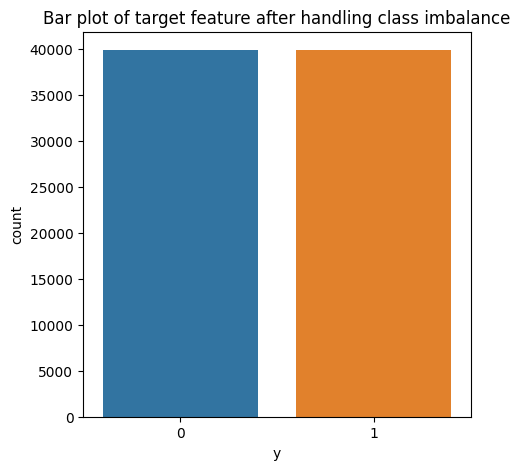

In [82]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
plt.show()


Class imbalance handled successfully using the Synthetic Minority Oversampling Technique (SMOTE).

### **Data Splitting**

In [83]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [84]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 36)
Shape of X_test : (15969, 36)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


We divided the dataset into 20% for model testing and 80% for training.

In [85]:
# Checking values of splitted dataset
X_train[0:3]

,default,age,sep,self-employed,marital,duration,oct,housemaid,student,aug,...,technician,management,balance_group,jan,unemployed,day,age_group,dec,services,balance
76180,0,70.028256,0,0,1,310,0,0,0,0,...,0,0,2,0,0,10,59.622605,0,0,3324
36038,0,50.000000,0,0,1,67,0,0,0,0,...,0,0,1,0,0,11,50.000000,0,0,4
41791,0,62.000000,0,0,1,78,1,0,0,0,...,0,1,0,0,0,13,60.000000,0,0,0


In [86]:
# Checking values of splitted dataset
X_test[0:3]

,default,age,sep,self-employed,marital,duration,oct,housemaid,student,aug,...,technician,management,balance_group,jan,unemployed,day,age_group,dec,services,balance
72809,0,37.587275,0,0,0,315,0,0,0,0,...,0,0,2,0,0,12,30.0,0,0,3462
71061,0,37.000000,0,0,0,643,0,0,0,0,...,0,0,2,0,0,21,30.0,0,0,1109
57176,0,54.030217,0,0,1,643,0,0,0,0,...,0,0,0,0,0,4,50.0,0,0,0


### **Data Scaling**

In [87]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [88]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.9910144 , 0.        , 0.        , 0.5       ,
        0.48211509, 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.5       ,
        0.        , 0.09977064, 0.        , 0.05263158, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.3       , 0.99056512, 0.        , 0.        ,
        0.97455752],
       [0.        , 0.60952381, 0.        , 0.        , 0.5       ,
        0.10419907, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.33333333, 0.75      , 0.        , 0.        ,
        0.36246313],
      

In [89]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 0.37309096, 0.        , 0.        , 0.        ,
        0.48989114, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.36666667, 0.25      , 0.        , 0.        ,
        1.        ],
       [0.        , 0.36190476, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.8       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.66666667, 0.25      , 0.        , 0.        ,
        0.56618732],
      